In [1]:
!pip install -U scikit-learn

# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [2]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [5]:
tweets_df = pd.read_csv('./data/medellin_tweets_labeled.csv', sep = ',')

In [6]:
tweets_df.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [7]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    5612
0.0     270
1.0     154
Name: sentiment, dtype: int64

In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.929755
0.0    0.044732
1.0    0.025514
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [9]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [10]:
tweets_labeled_df.shape

(424, 2)

In [11]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [12]:
tweets_nolabeled_df.shape

(5612, 2)

In [13]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [14]:
tweets_labeled_df.shape

(424, 2)

In [15]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [16]:
tweets_nolabeled_df.shape

(5612, 2)

In [17]:
tweets_labeled_df.head(40)

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0
5,@Don_Patriota1: Me acabo d enterar que al Sena...,0.0
6,@JoseMejiaCD: Abramos hilo de la abucheada tan...,0.0
7,@Leo_uribista: ‼️Hermoso…así fue tratado en su...,1.0
8,"@Nicols03804032: Hoy en el centro de Medellín,...",1.0
9,Me parece súper bien el rechazo a Petro en #Me...,0.0


### Splitting train and test datasets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [19]:
X_train.shape

(339,)

In [20]:
pd.Series(y_train).value_counts(normalize = True)

0.0    0.637168
1.0    0.362832
Name: sentiment, dtype: float64

In [21]:
X_test.shape

(85,)

In [22]:
pd.Series(y_test).value_counts(normalize = True)

0.0    0.635294
1.0    0.364706
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [23]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [24]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [25]:
X_bow = bow.fit_transform(X_train)

In [26]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [27]:
logistic_model = LogisticRegression(random_state = 2)

In [28]:
logistic_model.fit(X_bow, y_train)

LogisticRegression(random_state=2)

In [29]:
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))

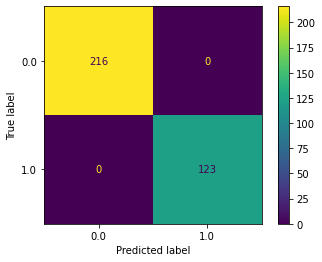

In [30]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

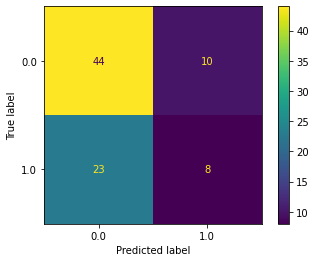

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [32]:
print('Precision:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precision: 0.4444444444444444
Recall: 0.25806451612903225
F1: 0.32653061224489793


### Training and evaluating a model using TF-IDF

In [33]:
logistic_model = LogisticRegression(random_state = 2)

In [34]:
logistic_model.fit(X_tfidf, y_train)

LogisticRegression(random_state=2)

In [35]:
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(bow.transform(X_test))

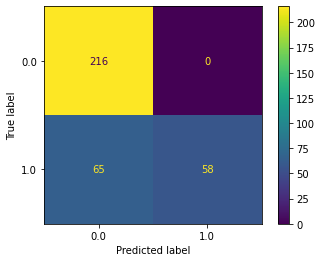

In [36]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

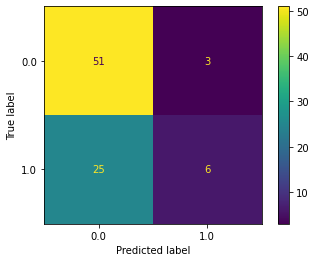

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [38]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precision: 0.6666666666666666
Recall: 0.1935483870967742
F1: 0.30000000000000004


### How interpret the results?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

### Segundo Entrenamiento de Datos con un aumento de 300 Datos Etiquetados

### Conversion de XLSX A CSV 

In [39]:
import pandas as pd
 
def xlsx_to_csv_pd():
    data_xls = pd.read_excel('./data/medellin_tweets (300).xlsx', index_col=0)
    data_xls.to_csv('./data/medellin_tweets_labeled300.csv', encoding='utf-8')
 
 
xlsx_to_csv_pd()


In [40]:
stop_words = set(stopwords.words('spanish'))

In [41]:
stop_words = set(stopwords.words('spanish'))

In [42]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [43]:
tweets_df = pd.read_csv('./data/medellin_tweets_labeled300.csv', sep = ',')

In [44]:
tweets_df.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [45]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    4340
0.0     952
1.0     744
Name: sentiment, dtype: int64

In [46]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.719019
0.0    0.157720
1.0    0.123260
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [47]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [48]:
tweets_labeled_df.shape

(1696, 2)

In [49]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [50]:
tweets_nolabeled_df.shape

(4340, 2)

In [51]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [52]:
tweets_labeled_df.shape

(1696, 2)

In [53]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [54]:
tweets_nolabeled_df.shape

(4340, 2)

In [55]:
tweets_labeled_df.head(40)

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0
5,@Don_Patriota1: Me acabo d enterar que al Sena...,0.0
6,@JoseMejiaCD: Abramos hilo de la abucheada tan...,0.0
7,@Leo_uribista: ‼️Hermoso…así fue tratado en su...,1.0
8,"@Nicols03804032: Hoy en el centro de Medellín,...",1.0
9,Me parece súper bien el rechazo a Petro en #Me...,0.0


### Splitting train and test datasets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [57]:
X_train.shape

(1356,)

In [58]:
pd.Series(y_train).value_counts(normalize = True)

0.0    0.561209
1.0    0.438791
Name: sentiment, dtype: float64

In [59]:
X_test.shape

(340,)

In [60]:
pd.Series(y_test).value_counts(normalize = True)

0.0    0.561765
1.0    0.438235
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [61]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [62]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [63]:
X_bow = bow.fit_transform(X_train)

In [64]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [65]:
logistic_model = LogisticRegression(random_state = 2)

In [66]:
logistic_model.fit(X_bow, y_train)

LogisticRegression(random_state=2)

In [67]:
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))

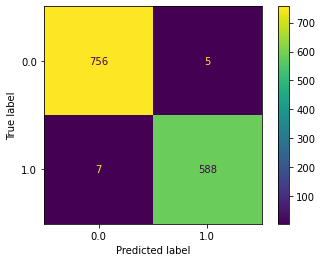

In [68]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

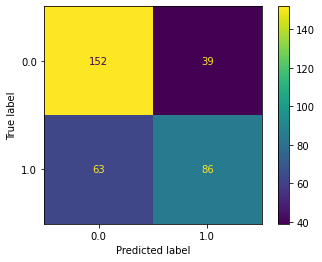

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [70]:
print('Precision:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precision: 0.688
Recall: 0.5771812080536913
F1: 0.6277372262773723


### Training and evaluating a model using TF-IDF

In [71]:
logistic_model = LogisticRegression(random_state = 2)

In [72]:
logistic_model.fit(X_tfidf, y_train)

LogisticRegression(random_state=2)

In [73]:
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(bow.transform(X_test))

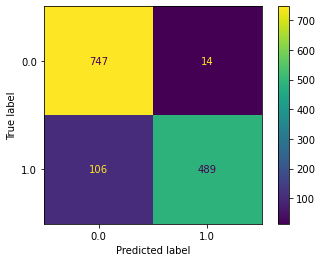

In [74]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

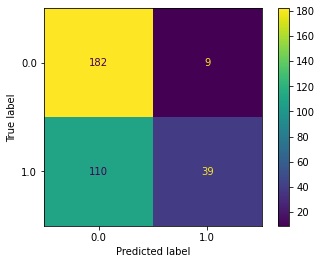

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [76]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precision: 0.8125
Recall: 0.26174496644295303
F1: 0.3959390862944163


### How interpret the results?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

### Tercer Entrenamiento de Datos con un aumento de 450 datos Etiquetados

In [77]:
import pandas as pd
 
def xlsx_to_csv_pd():
    data_xls = pd.read_excel('./data/medellin_tweets (600).xlsx', index_col=0)
    data_xls.to_csv('./data/medellin_tweets_labeled600FINAL.csv', encoding='utf-8')
 
 
xlsx_to_csv_pd()

In [78]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [79]:
tweets_df = pd.read_csv('./data/medellin_tweets_labeled600FINAL.csv', sep = ',')

In [80]:
tweets_df.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [81]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    3893
0.0    1249
1.0     894
Name: sentiment, dtype: int64

In [82]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.644964
0.0    0.206925
1.0    0.148111
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [83]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [84]:
tweets_labeled_df.shape

(2143, 2)

In [85]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [86]:
tweets_nolabeled_df.shape

(3893, 2)

In [87]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [88]:
tweets_labeled_df.shape

(2143, 2)

In [89]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [90]:
tweets_nolabeled_df.shape

(3893, 2)

In [91]:
tweets_labeled_df.head(40)

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0
5,@Don_Patriota1: Me acabo d enterar que al Sena...,0.0
6,@JoseMejiaCD: Abramos hilo de la abucheada tan...,0.0
7,@Leo_uribista: ‼️Hermoso…así fue tratado en su...,1.0
8,"@Nicols03804032: Hoy en el centro de Medellín,...",1.0
9,Me parece súper bien el rechazo a Petro en #Me...,0.0


### Splitting train and test datasets

In [92]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [93]:
X_train.shape

(1714,)

In [94]:
pd.Series(y_train).value_counts(normalize = True)

0.0    0.582847
1.0    0.417153
Name: sentiment, dtype: float64

In [95]:
X_test.shape

(429,)

In [96]:
pd.Series(y_test).value_counts(normalize = True)

0.0    0.582751
1.0    0.417249
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [97]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [98]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [99]:
X_bow = bow.fit_transform(X_train)

In [100]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [101]:
logistic_model = LogisticRegression(random_state = 2)

In [102]:
logistic_model.fit(X_bow, y_train)

LogisticRegression(random_state=2)

In [103]:
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))

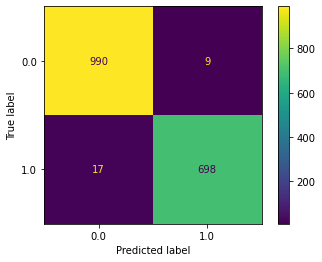

In [104]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

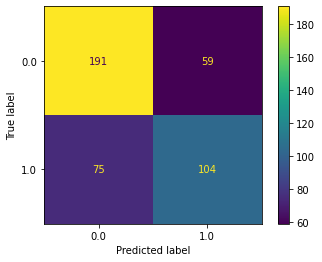

In [105]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [107]:
print('Precision:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precision: 0.6380368098159509
Recall: 0.5810055865921788
F1: 0.6081871345029239


### Training and evaluating a model using TF-IDF

In [108]:
logistic_model = LogisticRegression(random_state = 2)

In [109]:
logistic_model.fit(X_tfidf, y_train)

LogisticRegression(random_state=2)

In [110]:
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(bow.transform(X_test))

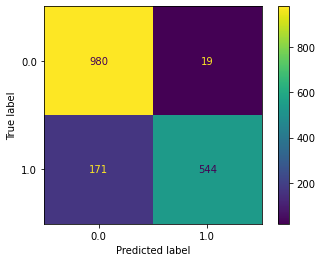

In [111]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

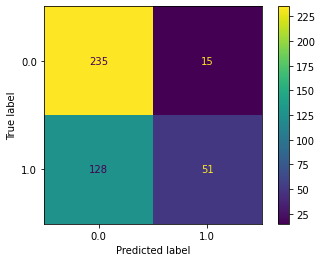

In [112]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [114]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precision: 0.7727272727272727
Recall: 0.2849162011173184
F1: 0.41632653061224484


### How interpret the results?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

### Punto 2 Datos mal etiquetados

In [115]:
stop_words = set(stopwords.words('spanish'))

In [116]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

In [117]:
tweets_df = pd.read_csv('./data/medellin_tweets_labeled600FINAL.csv', sep = ',')

In [118]:
tweets_df.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [119]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    3893
0.0    1249
1.0     894
Name: sentiment, dtype: int64

In [120]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.644964
0.0    0.206925
1.0    0.148111
Name: sentiment, dtype: float64

In [121]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [122]:
tweets_labeled_df.shape

(2143, 2)

In [123]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [124]:
tweets_nolabeled_df.shape

(3893, 2)

In [125]:
tweets_labeled_df.head(40)

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0
5,@Don_Patriota1: Me acabo d enterar que al Sena...,0.0
6,@JoseMejiaCD: Abramos hilo de la abucheada tan...,0.0
7,@Leo_uribista: ‼️Hermoso…así fue tratado en su...,1.0
8,"@Nicols03804032: Hoy en el centro de Medellín,...",1.0
9,Me parece súper bien el rechazo a Petro en #Me...,0.0


### Splitting train and test datasets.

In [126]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [127]:
X_train.shape

(1714,)

In [128]:
pd.Series(y_train).value_counts(normalize = True)

0.0    0.582847
1.0    0.417153
Name: sentiment, dtype: float64

In [129]:
X_test.shape

(429,)

In [130]:
pd.Series(y_test).value_counts(normalize = True)

0.0    0.582751
1.0    0.417249
Name: sentiment, dtype: float64

### Vectorizing texts.

In [131]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [132]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [133]:
X_bow = bow.fit_transform(X_train)

In [134]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW. 

In [135]:
logistic_model = LogisticRegression(random_state = 2)

In [136]:
logistic_model.fit(X_bow, y_train)

LogisticRegression(random_state=2)

In [137]:
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))

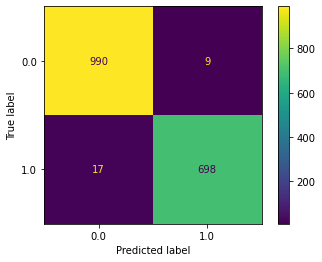

In [138]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

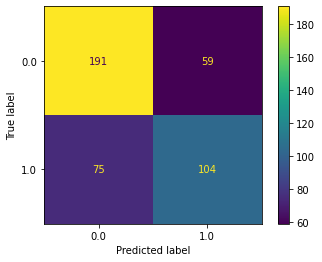

In [139]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [140]:
print('Precision:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precision: 0.6380368098159509
Recall: 0.5810055865921788
F1: 0.6081871345029239


### Training and evaluating a model using TF-IDF.

In [141]:
logistic_model = LogisticRegression(random_state = 4)

In [142]:
logistic_model.fit(X_tfidf, y_train)

LogisticRegression(random_state=4)

In [143]:
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(bow.transform(X_test))

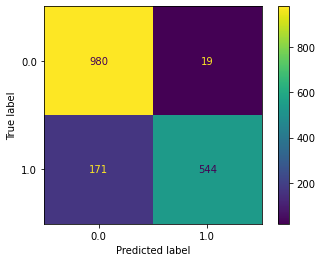

In [158]:
 predictions = ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

In [169]:
print(y_test.head(45))

1243    0.0
4514    0.0
5494    1.0
211     1.0
5325    0.0
241     1.0
1622    1.0
5874    0.0
370     0.0
121     0.0
6033    0.0
3825    1.0
3102    1.0
826     0.0
1073    0.0
4542    1.0
267     1.0
1495    1.0
327     1.0
5328    1.0
813     0.0
4563    0.0
777     0.0
54      1.0
5537    0.0
5992    0.0
4562    0.0
5911    0.0
4510    0.0
262     1.0
5495    1.0
5960    0.0
1450    1.0
369     1.0
148     1.0
4551    0.0
1       0.0
249     0.0
458     0.0
4543    0.0
5808    0.0
1244    1.0
847     1.0
629     1.0
1140    0.0
Name: sentiment, dtype: float64


In [170]:
print(y_test_tfidf_predict, y_test)

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.

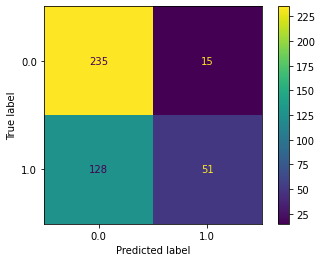

In [171]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [172]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precision: 0.7727272727272727
Recall: 0.2849162011173184
F1: 0.41632653061224484
